In [102]:
%load_ext autoreload
%autoreload 2
    
import src.multiagent_mpc as mpc
import src.traffic_world as tw
import src.car_plotting_multiple as cmplot
import glob
import argparse
import json
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [103]:
list_of_logs = glob.glob('/home/nbuckman/mpc_results/cntrld_tx2/*')

In [104]:
log_param = {}
log_traj = {}
for LOG_DIRECTORY in list_of_logs:
#     LOG_DIRECTORY = '/home/nbuckman/mpc_results/bc5a-5877-20210303-210427/'
    LOG_DIRECTORY = LOG_DIRECTORY + "/"
    # Arguments
    camera_speed = -1
    shape = 'image'
    svo_colors = 1
    n_workers = 8
    fps = 16


    VEHICLE_PATH = LOG_DIRECTORY + 'ambulance.p'
    OTHER_VEHICLE_PATH = LOG_DIRECTORY + 'other_vehicles.p'
    TRAJ_PATH = LOG_DIRECTORY + 'trajectories.npy'
    PARAMS_PATH = LOG_DIRECTORY + 'params.json'
    WORLD_PATH = LOG_DIRECTORY + 'world.p'

    try:
        trajectory = np.load(open(TRAJ_PATH,'rb'))
    except FileNotFoundError:
        continue
        
    xamb = trajectory[0, :, :]
    xothers = trajectory[1:, :, :]

    
    # Load data
    with open(PARAMS_PATH) as fp:
        params = json.load(fp)

    response_vehicle = pickle.load(open(VEHICLE_PATH,'rb'))
    other_vehicles = pickle.load(open(OTHER_VEHICLE_PATH,'rb')) #TODO:  save all the vehicles in one file
    #
    try:
        world = pickle.load(open(WORLD_PATH,'rb'))
    except FileNotFoundError:
        WORLD_PATH = LOG_DIRECTORY + 'data/world.p'
        world = pickle.load(open(WORLD_PATH,'rb'))
    
    print(LOG_DIRECTORY)
    for key in ['seed', 'rnds_shrd_cntrl', "n_cntrld", "shrd_cntrl_scheduler"]:
        try:
            print(key, params[key])
        except KeyError:
            print("Param Not Valid", key)

    print("Distance Traveled %.02f"%(xamb[0,-1] - xamb[0,0]))    
    
    log_param[LOG_DIRECTORY] = params
    log_traj[LOG_DIRECTORY] = (xamb[0,-1] - xamb[0,0])
    
    continue
    
    
    log_string = LOG_DIRECTORY.split('/')[-2]
    VIDEO_OUT_PATH = LOG_DIRECTORY + log_string + '.mp4'


    # generate pictures for animation






    # Prep a temp image directory


    if camera_speed == -1:
        camera_speed = np.mean(xamb[4,:])

    if svo_colors == 1:
        svo = []
        for veh in other_vehicles:
            if hasattr(veh, "theta_ij"):
                svo += [veh.theta_ij[-1]]
            else:
                svo += [veh.theta_iamb]
        car_colors = ['r' for i in range(len(svo))]
        for i in range(len(svo)):
            if svo[i] < np.pi/8.0:
                car_colors[i] = 'red'
            elif np.pi/8 <= svo[i] <= 3*np.pi/8.0:
                car_colors[i] = 'purple'
            elif np.pi/8 <= svo[i] <= np.pi/2.0:
                car_colors[i] = 'blue'
    else:
        car_colors = None



    IMG_DIR = LOG_DIRECTORY + 'temp/'
    print("Saving photos to %s..."%(IMG_DIR))

    os.makedirs(IMG_DIR, exist_ok=True)    
    for f in glob.glob(os.path.join(IMG_DIR, "*.png")):
        os.remove(f)
    try:
        os.remove(VIDEO_OUT_PATH)
    except OSError:
        pass

    cmplot.plot_cars(world, response_vehicle, xamb, [xothers[i,:,:] for i in range(xothers.shape[0])],
                    IMG_DIR, shape, camera_speed, None, car_colors, n_workers)              

    outfile = cmplot.animate(IMG_DIR, VIDEO_OUT_PATH, fps)

    vid_directory = '/home/nbuckman/mpc-vids/'
    cmd = 'cp %s %s'%(VIDEO_OUT_PATH, vid_directory)
    os.system(cmd)


/home/nbuckman/mpc_results/cntrld_tx2/cntrld_18_03-03-2021-202349/
seed 8
rnds_shrd_cntrl 2
n_cntrld 1
Param Not Valid shrd_cntrl_scheduler
Distance Traveled 714.33
/home/nbuckman/mpc_results/cntrld_tx2/cntrld_38_03-03-2021-203219/
seed 8
rnds_shrd_cntrl 2
n_cntrld 3
Param Not Valid shrd_cntrl_scheduler
Distance Traveled 714.32
/home/nbuckman/mpc_results/cntrld_tx2/cntrld_09_03-03-2021-202326/
seed 9
rnds_shrd_cntrl 2
n_cntrld 0
Param Not Valid shrd_cntrl_scheduler
Distance Traveled 801.15
/home/nbuckman/mpc_results/cntrld_tx2/cntrld_04_03-03-2021-202326/
seed 4
rnds_shrd_cntrl 2
n_cntrld 0
Param Not Valid shrd_cntrl_scheduler
Distance Traveled 690.97
/home/nbuckman/mpc_results/cntrld_tx2/cntrld_16_03-03-2021-202349/
seed 6
rnds_shrd_cntrl 2
n_cntrld 1
Param Not Valid shrd_cntrl_scheduler
Distance Traveled 800.61
/home/nbuckman/mpc_results/cntrld_tx2/cntrld_14_03-03-2021-202349/
seed 4
rnds_shrd_cntrl 2
n_cntrld 1
Param Not Valid shrd_cntrl_scheduler
Distance Traveled 800.48
/home/nbuc

In [105]:
log_param

{'/home/nbuckman/mpc_results/cntrld_tx2/cntrld_18_03-03-2021-202349/': {'load_log_dir': None,
  'log_subdir': 'cntrld/cntrld_18_03-03-2021-202349',
  'n_processors': 8,
  'mpc_start_iteration': 0,
  'save_solver_input': False,
  'seed': 8,
  'car_density': 3000,
  'n_other': 20,
  'n_lanes': 2,
  'random_svo': 1,
  'svo_theta': 0.0,
  'n_mpc': 30,
  'plot_flag': False,
  'print_flag': False,
  'T': 5,
  'dt': 0.2,
  'p_exec': 0.4,
  'n_ibr': 3,
  'n_cntrld': 1,
  'rnds_shrd_cntrl': 2,
  'k_solve_amb_max_ibr': 2,
  'plan_fake_ambulance': False,
  'save_ibr': False,
  'save_state': False,
  'default_n_warm_starts': 15,
  'k_max_slack': 0.01,
  'k_max_solve_number': 3,
  'k_max_round_with_slack': inf,
  'k_slack_d': 1000,
  'k_CA_d': 0.05,
  'k_CA_power': 1.0,
  'wall_CA': 1,
  'print_level': 0,
  'start_time_string': '20210303-202411',
  'N': 25,
  'number_ctrl_pts_executed': 10,
  'pid': 42035},
 '/home/nbuckman/mpc_results/cntrld_tx2/cntrld_38_03-03-2021-203219/': {'load_log_dir': None

In [114]:
all_n_cntrld = set([log_param[l]['n_cntrld'] for l in log_param])
all_seeds = set([log_param[l]['seed'] for l in log_param])

In [115]:
ncntrld_seeds = dict()
for ncntrld in all_n_cntrld:
    ncntrld_seeds[ncntrld] = [log_param[log]["seed"] for log in log_param if log_param[log]['n_cntrld']==ncntrld]
    all_seeds &= set(ncntrld_seeds[ncntrld]) 

In [117]:
ncntrld_ambx = dict()
for ncntrld in all_n_cntrld:
    ncntrld_ambx[ncntrld] = [log_traj[log] for log in log_param if (log_param[log]["seed"] in all_seeds and log_param[log]["n_cntrld"]==ncntrld)]

In [118]:
print("n_cntrld,  mean,   median,   std,  n")
for ncntrld in ncntrld_ambx:
    print("       %1d,    %.2f,   %.2f      %.2f   %d"%(ncntrld, 
                                         np.mean(ncntrld_ambx[ncntrld]), 
                                         np.median(ncntrld_ambx[ncntrld]), 
                                         np.std(ncntrld_ambx[ncntrld]), len(ncntrld_ambx[ncntrld])))
    


n_cntrld,  mean,   median,   std,  n
       0,    754.32,   800.36      52.42   9
       1,    785.99,   800.79      29.11   9
       2,    786.09,   800.68      29.01   9
       3,    788.85,   800.81      26.88   11


Text(0, 0.5, 'amb dist trav [m]')

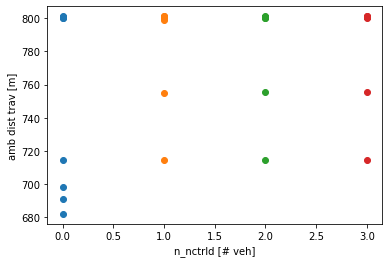

In [119]:
for ncntrld in ncntrld_ambx:
    plt.plot([ncntrld for _ in ncntrld_ambx[ncntrld]],
            [_ for _ in ncntrld_ambx[ncntrld]],'o')
plt.xlabel('n_nctrld [# veh]')
plt.ylabel('amb dist trav [m]')

In [158]:
print("n_cntrld:", ["  %d   "%s for s in all_seeds])
for n_cntrld in ncntrld_ambx:
    list_by_seed = []
    for seed in all_seeds:
        r = [log_traj[log] for log in log_param 
               if (log_param[log]['seed']==seed and log_param[log]['n_cntrld']== n_cntrld and log_param[log]['n_mpc']==30)][0]
        list_by_seed += ['%.2f'%r]
    print("     ", n_cntrld,":", list_by_seed)
#     print(['%.2f'%x for x in list_by_seed])

n_cntrld: ['  0   ', '  1   ', '  2   ', '  3   ', '  4   ', '  5   ', '  7   ', '  8   ', '  9   ']
      0 : ['800.36', '800.40', '698.25', '681.97', '690.97', '800.61', '800.81', '714.33', '801.15']
      1 : ['800.79', '801.03', '754.77', '799.23', '800.48', '801.13', '801.02', '714.33', '801.15']
      2 : ['800.80', '800.34', '755.64', '800.68', '800.24', '800.91', '800.78', '714.31', '801.15']
      3 : ['800.82', '800.76', '800.95', '800.70', '800.22', '801.13', '800.81', '714.32', '801.15']


In [125]:
log_param['/home/nbuckman/mpc_results/cntrld_tx2/cntrld_30_03-03-2021-202419/']['n_cntrld']==3

True

In [129]:
print([log for log in log_param 
       if (log_param[log]['seed']==0 & log_param[log]['n_cntrld']== 0)])

['/home/nbuckman/mpc_results/cntrld_tx2/cntrld_30_03-03-2021-202419/', '/home/nbuckman/mpc_results/cntrld_tx2/cntrld_10_03-03-2021-202349/', '/home/nbuckman/mpc_results/cntrld_tx2/cntrld_20_03-03-2021-202400/', '/home/nbuckman/mpc_results/cntrld_tx2/cntrld_00_03-03-2021-202326/']
